# Tutorial 3: Manual Feature Extraction/Engineering

---

### Introduction

In this notebook, we will extract/engineer features traditional statisitcal methods, suggested methods:
- Discrete Lablacian
- gaussian_gradient_magnitude
- generic_gradient_magnitude

@@@ do we need the three of them, also I wont do the fourier transform, it will take time.

First we import some libraries:

In [1]:
import matplotlib.pyplot as plt # for plotting data/graphs
import numpy as np # For handling N-DIMENSIONAL ARRAYS
import pandas as pd # for importing data into data frame format

from scipy import ndimage, misc # ndimage: contains various functions for multidimensional image processing
                               # misc: Various utilities that don’t have another home.
import matplotlib.pyplot as plt # to draw images


---

### Reading in data

In [2]:
from galaxy_mnist import GalaxyMNISTHighrez

dataset_train = GalaxyMNISTHighrez(
    root='data_import/data',
    download=True,
    train=True  # by default, or False for canonical test set
)
# for the testing data
dataset_test = GalaxyMNISTHighrez(
    root='data_import/data',
    download=True,
    train=False  # by default, or False for canonical test set
)

In [3]:
images_train = dataset_train.data
images_test = dataset_test.data
labels_train = dataset_train.targets
labels_test = dataset_test.targets


---

### Pre-processing 

In [4]:
from source.pre import pre_processing #  A predefined function to pre-process the data as we did in tutorial 1

In [5]:
# pre-processing(data, size) function takes two arguments
# 1. data: the data to be processed
# 2. The size for which the data needs to be reduced.
images_trainPre = pre_processing(images_train, 112)
images_testPre = pre_processing(images_test, 112)

In [6]:
images_trainPre.shape

(8000, 112, 112)

Displaying images after pre-processing

label: smooth_round


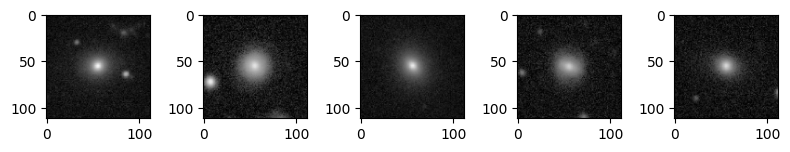

label: smooth_cigar


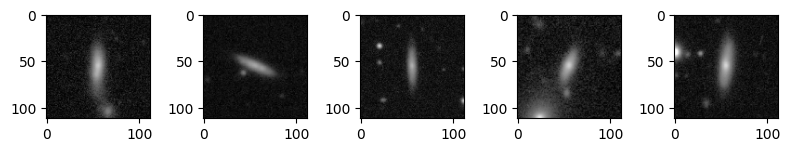

label: edge_on_disk


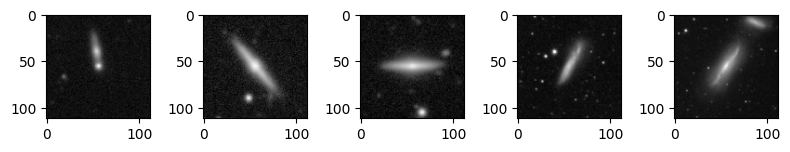

label: unbarred_spiral


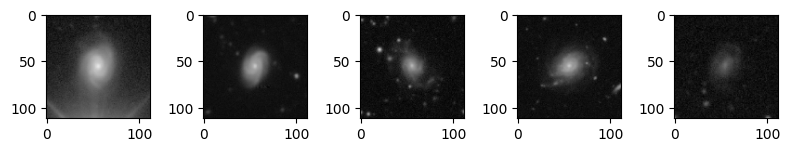

In [7]:
rows = 1
columns = 5
for j in range(len(GalaxyMNISTHighrez.classes)):
    fig = plt.figure(figsize=(8, 8))# Figure is 8 inches by 8 inches
    for i in range (columns):    # Create images in each column
        train_image = images_trainPre[(labels_train == j)][i]
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(train_image*255,cmap='gray', vmin=0, vmax=255) 
                            # we have to multiply the image by 255 to restore the original values
    print("label: "+str(GalaxyMNISTHighrez.classes[j]))
    plt.tight_layout()
    plt.show() 

---

### Feature Engineering

In this section, we will try to use manual tools to engineer the images. The aim is to highlight features in the images that can be detected easily by classical machine learning tools. Notice that this step is being done automatically in deep learning tools.
more can be found [here](https://docs.scipy.org/doc/scipy/reference/ndimage.html)

#### [laplace](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.laplace.html)

 @@ I need to add a video for laplace here, also is there a better way to code this, having two sepeate for loops for the before and after
 maybe I can do this as an exercise

Original: smooth_round


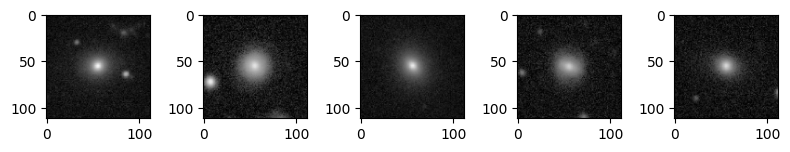

pre_image: smooth_round


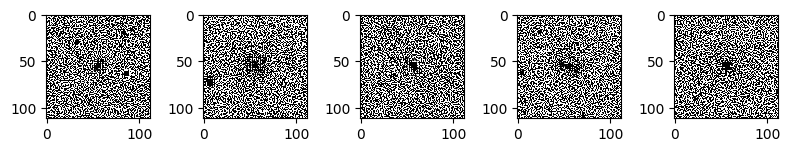

        ______________________________________________________________________________     
Original: smooth_cigar


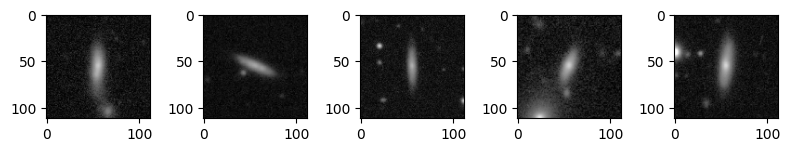

pre_image: smooth_cigar


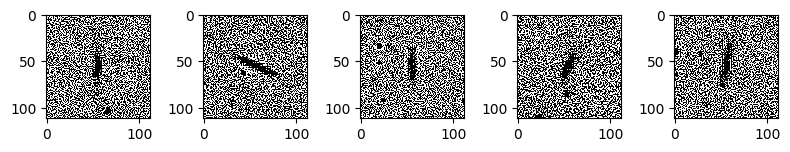

        ______________________________________________________________________________     
Original: edge_on_disk


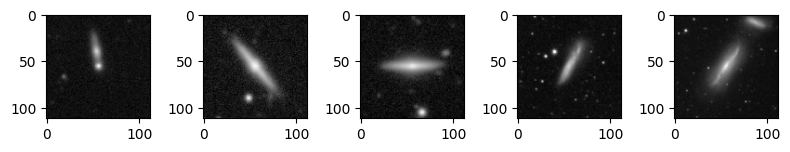

pre_image: edge_on_disk


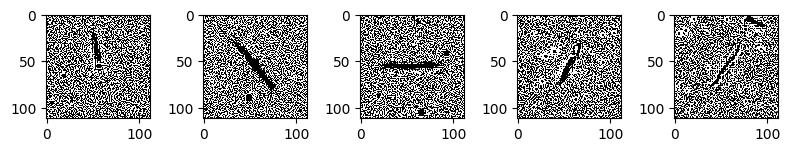

        ______________________________________________________________________________     
Original: unbarred_spiral


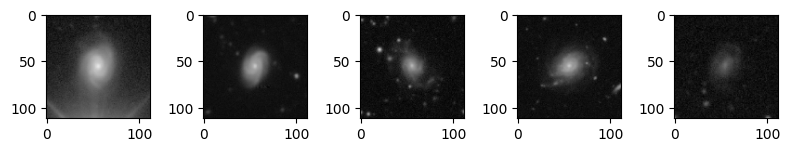

pre_image: unbarred_spiral


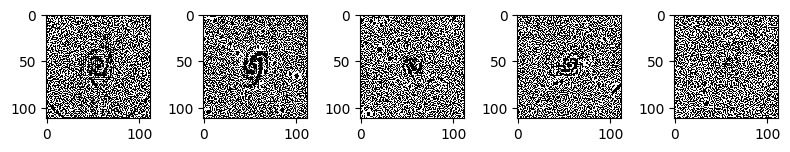

        ______________________________________________________________________________     


In [8]:
rows = 1
columns = 5
for j in range(len(GalaxyMNISTHighrez.classes)):
    fig = plt.figure(figsize=(8, 8))# Figure is 8 inches by 8 inches
    for i in range (columns):    # Create images in each column
        train_image = images_trainPre[(labels_train == j)][i]
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(train_image*255,cmap='gray', vmin=0, vmax=255) 
                            # we have to multiply the image by 255 to restore the original values
    print("Original: "+str(GalaxyMNISTHighrez.classes[j]))
    plt.tight_layout()
    plt.show() 
    
    fig = plt.figure(figsize=(8, 8))# Figure is 8 inches by 8 inches
    for i in range (columns):    # Create images in each column
        pre_image = ndimage.laplace(images_trainPre[(labels_train == j)][i] ,mode = 'nearest'  )*255*200 # can we highlight the difference better than this
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(pre_image,cmap='gray', vmin=0, vmax=255) 
                            # we have to multiply the image by 255 to restore the original values
    print("pre_image: "+str(GalaxyMNISTHighrez.classes[j]))
    plt.tight_layout()
    plt.show() 
    print("        ______________________________________________________________________________     ")
    

---

#### [gaussian_gradient_magnitude](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_gradient_magnitude.html#scipy.ndimage.gaussian_gradient_magnitude)

This method works well when it quickly goes from very bright to dark.

Original: smooth_round


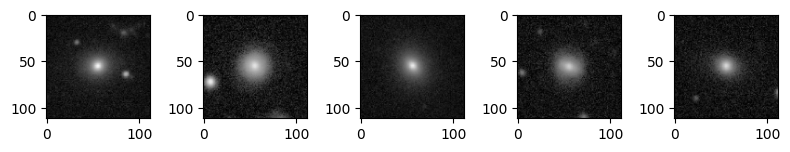

pre_image: smooth_round


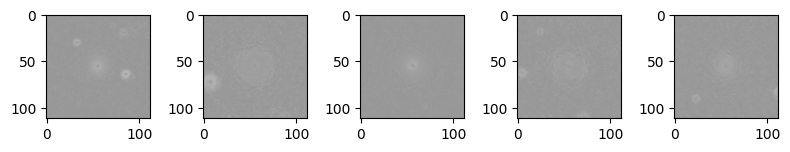

                       ______________________________________________________________________________     
Original: smooth_cigar


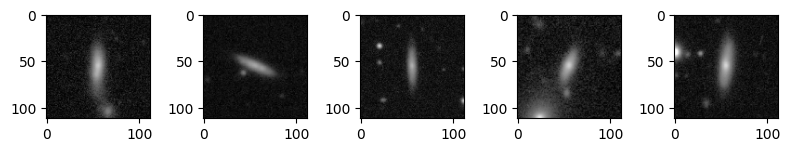

pre_image: smooth_cigar


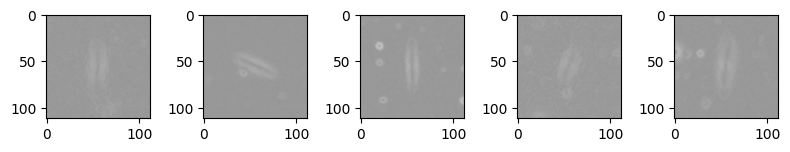

                       ______________________________________________________________________________     
Original: edge_on_disk


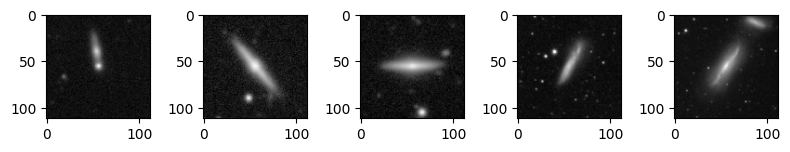

pre_image: edge_on_disk


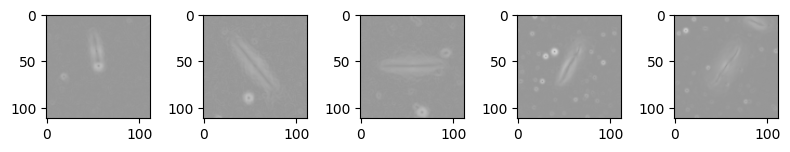

                       ______________________________________________________________________________     
Original: unbarred_spiral


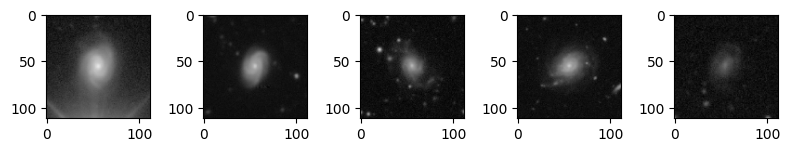

pre_image: unbarred_spiral


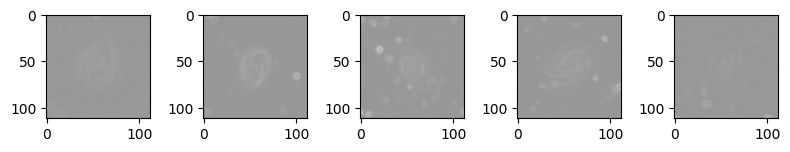

                       ______________________________________________________________________________     


In [9]:
ows = 1
columns = 5
for j in range(len(GalaxyMNISTHighrez.classes)):
    fig = plt.figure(figsize=(8, 8))# Figure is 8 inches by 8 inches
    for i in range (columns):    # Create images in each column
        train_image = images_trainPre[(labels_train == j)][i]
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(train_image*255,cmap='gray', vmin=0, vmax=255) 
                            # we have to multiply the image by 255 to restore the original values
    print("Original: "+str(GalaxyMNISTHighrez.classes[j]))
    plt.tight_layout()
    plt.show() 
    
    fig = plt.figure(figsize=(8, 8))# Figure is 8 inches by 8 inches
    for i in range (columns):    # Create images in each column
        pre_image = ndimage.gaussian_gradient_magnitude(images_trainPre[(labels_train == j)][i], sigma=1, mode = 'reflect'  )*255+150
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(pre_image,cmap='gray', vmin=0, vmax=255) 
                            # we have to multiply the image by 255 to restore the original values
    print("pre_image: "+str(GalaxyMNISTHighrez.classes[j]))
    plt.tight_layout()
    plt.show() 
    print("                       ______________________________________________________________________________     ")

---

#### [generic_gradient_magnitude](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.generic_gradient_magnitude.html)

Original: smooth_round


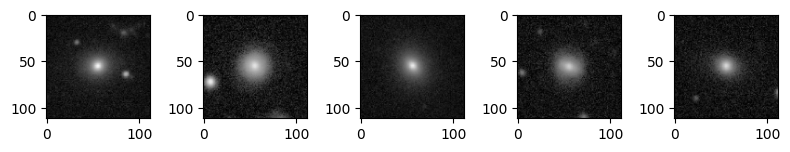

pre_image: smooth_round


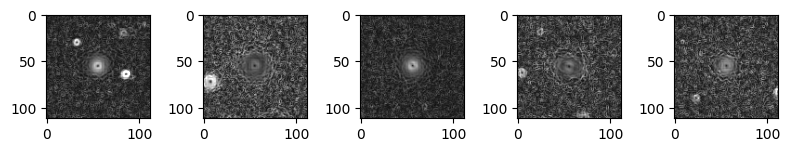

     ______________________________________________________________________________     
Original: smooth_cigar


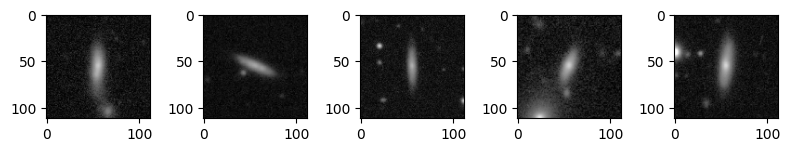

pre_image: smooth_cigar


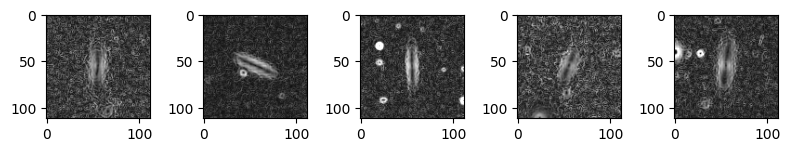

     ______________________________________________________________________________     
Original: edge_on_disk


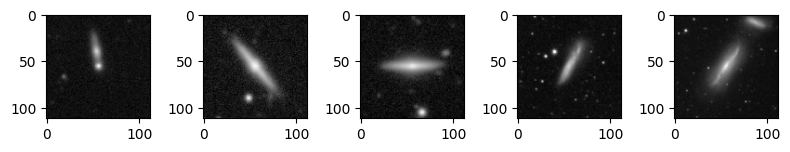

pre_image: edge_on_disk


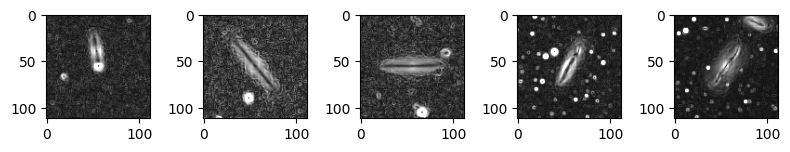

     ______________________________________________________________________________     
Original: unbarred_spiral


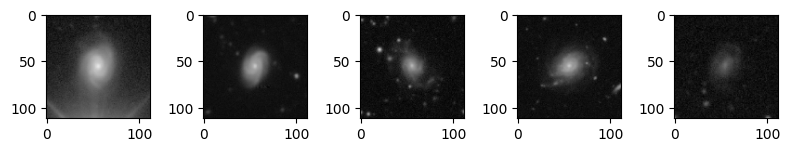

pre_image: unbarred_spiral


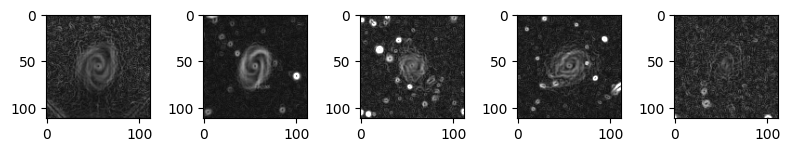

     ______________________________________________________________________________     


In [11]:
ows = 1
columns = 5
for j in range(len(GalaxyMNISTHighrez.classes)):
    fig = plt.figure(figsize=(8, 8))# Figure is 8 inches by 8 inches
    for i in range (columns):    # Create images in each column
        train_image = images_trainPre[(labels_train == j)][i]
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(train_image*255,cmap='gray', vmin=0, vmax=255) 
                            # we have to multiply the image by 255 to restore the original values
    print("Original: "+str(GalaxyMNISTHighrez.classes[j]))
    plt.tight_layout()
    plt.show() 
    
    fig = plt.figure(figsize=(8, 8))# Figure is 8 inches by 8 inches
    for i in range (columns):    # Create images in each column
        pre_image = ndimage.generic_gradient_magnitude(images_trainPre[(labels_train == j)][i], ndimage.sobel)*255+15
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(pre_image,cmap='gray', vmin=0, vmax=255) 
                            # we have to multiply the image by 255 to restore the original values
    print("pre_image: "+str(GalaxyMNISTHighrez.classes[j]))
    plt.tight_layout()
    plt.show() 
    print("     ______________________________________________________________________________     ")
    

---

#### **_Save the data that you think will give the best performance_**